<a href="https://colab.research.google.com/github/majavier26/DSProjects/blob/main/Baybayin%20OCR/Baybayin_script_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import seaborn as sns

# Machine learning
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Baybayin script classification

We will get our data from this [Kaggle dataset](https://www.kaggle.com/datasets/jamesnogra/baybayn-baybayin-handwritten-images?select=a.CEmJ-James.jpg). We are also following [this Youtube video](https://www.youtube.com/watch?v=jztwpsIzEGc) as a guide.

## Data obtainment

In [ ]:
# Check for my Kaggle API
if os.path.exists('~/.kaggle/') != True:
  ! mkdir ~/.kaggle/
  ! cp /content/drive/MyDrive/Kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
  ! chmod 600 ~/.kaggle/kaggle.json
# Check if I already have the data
if os.path.exists('/content/baybayin_data') != True:
  ! mkdir baybayin_data
# Check if data already exist in the folder
if os.path.exists('/content/baybayin_data/a.0JWo-James.jpg') != True:
  ! kaggle datasets download jamesnogra/baybayn-baybayin-handwritten-images
  ! unzip baybayn-baybayin-handwritten-images.zip
  ! mv *.jpg* baybayin_data
  ! for f in *.jpg*; do mv "$f" "${f// /-}" && mv "${f// /-}" baybayin_data/; #done
else:
  ! mv *.jpg* baybayin_data
  ! for f in *.jpg*; do mv "$f" "${f// /-}" && mv "${f// /-}" baybayin_data/; #done

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
cp: cannot stat '/content/drive/MyDrive/Kaggle_API_credentials/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/jamesnogra/baybayn-baybayin-handwritten-images
License(s): copyright-authors
baybayn-baybayin-handwritten-images.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  baybayn-baybayin-handwritten-images.zip
replace a.0JWo-James.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: ha.1YD5-Neil .jpg       
  inflating: ha.I7fa-Neil .jpg       
  inflating: ha.IgsF-Neil .jpg       
  inflating: ha.MqDp-Neil .jpg       
  inflating: ha.YUor-Neil .jpg       
  inflating: sa.neH8-Lutian Grace .jpg  


Now, we need to clean our data a bit. We need to organize them into folders because we have over 9k images in `baybayin_data`.

In [ ]:
# Getting the filenames of our folder
baybayin_filenames = os.listdir('/content/baybayin_data')
baybayin_filenames.sort()

# Getting every unique syllable
syllable_list = []
for filename in baybayin_filenames:
  if filename.split('.')[0] not in syllable_list:
    syllable_list.append(filename.split('.')[0])
  else:
    pass

In [ ]:
np.sort(syllable_list)

array(['a', 'b', 'ba', 'be_bi', 'bo_bu', 'd', 'da_ra', 'de_di', 'do_du',
       'e_i', 'g', 'ga', 'ge_gi', 'go_gu', 'h', 'ha', 'he_hi', 'ho_hu',
       'k', 'ka', 'ke_ki', 'ko_ku', 'l', 'la', 'le_li', 'lo_lu', 'm',
       'ma', 'me_mi', 'mo_mu', 'n', 'na', 'ne_ni', 'ng', 'nga', 'nge_ngi',
       'ngo_ngu', 'no_nu', 'o_u', 'p', 'pa', 'pe_pi', 'po_pu', 'r', 'ra',
       're_ri', 'ro_ru', 's', 'sa', 'se_si', 'so_su', 't', 'ta', 'te_ti',
       'to_tu', 'w', 'wa', 'we_wi', 'wo_wu', 'y', 'ya', 'ye_yi', 'yo_yu'],
      dtype='<U7')

Now, we need to put every file to their respective folders. For example, each of these files will be moved to the 'a' folder,
- 'a.0JWo-James.jpg'
- 'a.0xvU-Lutian Grace .jpg'
...

and these will be move to the 'ba' folder:
- 'ba.8HTS-James.jpg'
- 'ba.E8lb-James.jpg'

In [ ]:
# Making a folder for every syllable
for syllable in syllable_list:
  folder_path = f'/content/baybayin_data/{syllable}'
  if not os.path.exists(folder_path):
      os.makedirs(folder_path)

# Moving each file to their respective folder
for syllable in syllable_list:
  # Copy filenames folder
  filenames_copy = np.copy(baybayin_filenames)
  for filename in filenames_copy:
    if syllable == filename.split('.')[0]:
      # Moving the file
      print(f"Moving file {filename}")
      ! mv /content/baybayin_data/{filename} /content/baybayin_data/{syllable}
      filenames_copy.tolist().remove(filename)

Streaming output truncated to the last 5000 lines.
Moving file nga.0laE-James.jpg
Moving file nga.0qJG-James.jpg
Moving file nga.104K-James.jpg
Moving file nga.1Rdh-John.jpg~HEAD
Moving file nga.1Rdh-John.jpg~fb1eed4e69085305c2fb8c71936ae12e94df9c9f
Moving file nga.1SqT-John.jpg
Moving file nga.1WCl-Nino.jpg
Moving file nga.1zC0-Luntian Grace.jpg
mv: cannot stat '/content/baybayin_data/nga.1zC0-Luntian': No such file or directory
mv: cannot stat 'Grace.jpg': No such file or directory
Moving file nga.2CZx-Nino.jpg
Moving file nga.2LBr-James.jpg
Moving file nga.2M0d-James.jpg
Moving file nga.2tQg-John.jpg
Moving file nga.35zb-James.jpg
Moving file nga.3HHS-Roger.jpg
Moving file nga.3gha-James.jpg
Moving file nga.3oC4-James.jpg
Moving file nga.3yaO-James.jpg
Moving file nga.46DX-James.jpg
Moving file nga.4T2R-John.jpg
Moving file nga.4iha-John.jpg
Moving file nga.6Jlb-John.jpg
Moving file nga.6LwE-James.jpg
Moving file nga.7FQi-James.jpg
Moving file nga.7YbJ-James.jpg
Moving file nga.7iYU

Let's see what some of these looks like.

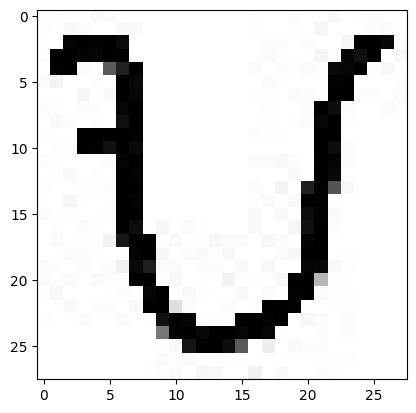

In [ ]:
image = cv2.imread(f'/content/baybayin_data/a/{baybayin_filenames[3]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='Greys_r')

Now, we will resize our image to 128x128, which is the standard for convolution neural networks.

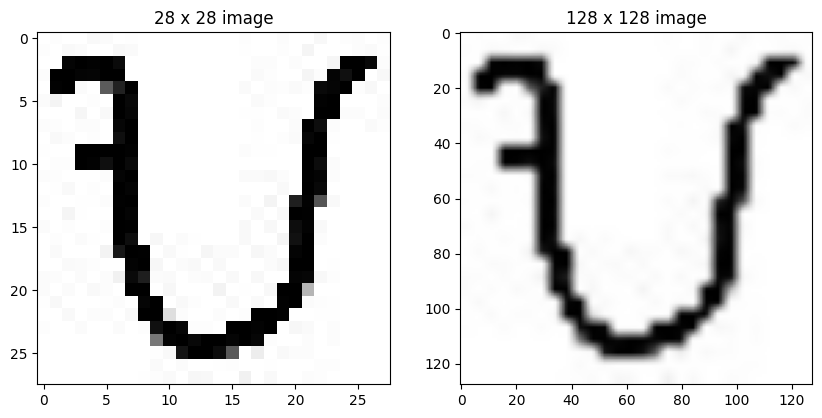

In [ ]:
image_resize = cv2.resize(image, (128, 128))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Image
ax[0].imshow(image, cmap='Greys_r')
ax[0].set_title('28 x 28 image')
# Resized images
ax[1].imshow(image_resize, cmap='Greys_r')
ax[1].set_title('128 x 128 image')

plt.show()

## Inputting our data

Now, we're gonna use a combination of TensorFlow and Keras for our models. We will also resize our images from 28x28 to 128x128.

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('baybayin_data', image_size=(128, 128), color_mode='grayscale')

Found 9618 files belonging to 63 classes.


Since the `data` object created from `keras.utils` is a generator, we still need to convert it as an iterator.

In [ ]:
# Iterating through data
data_iterator = data.as_numpy_iterator()

# Making a batch
batch = data_iterator.next()

Let's try to visualize this batch.

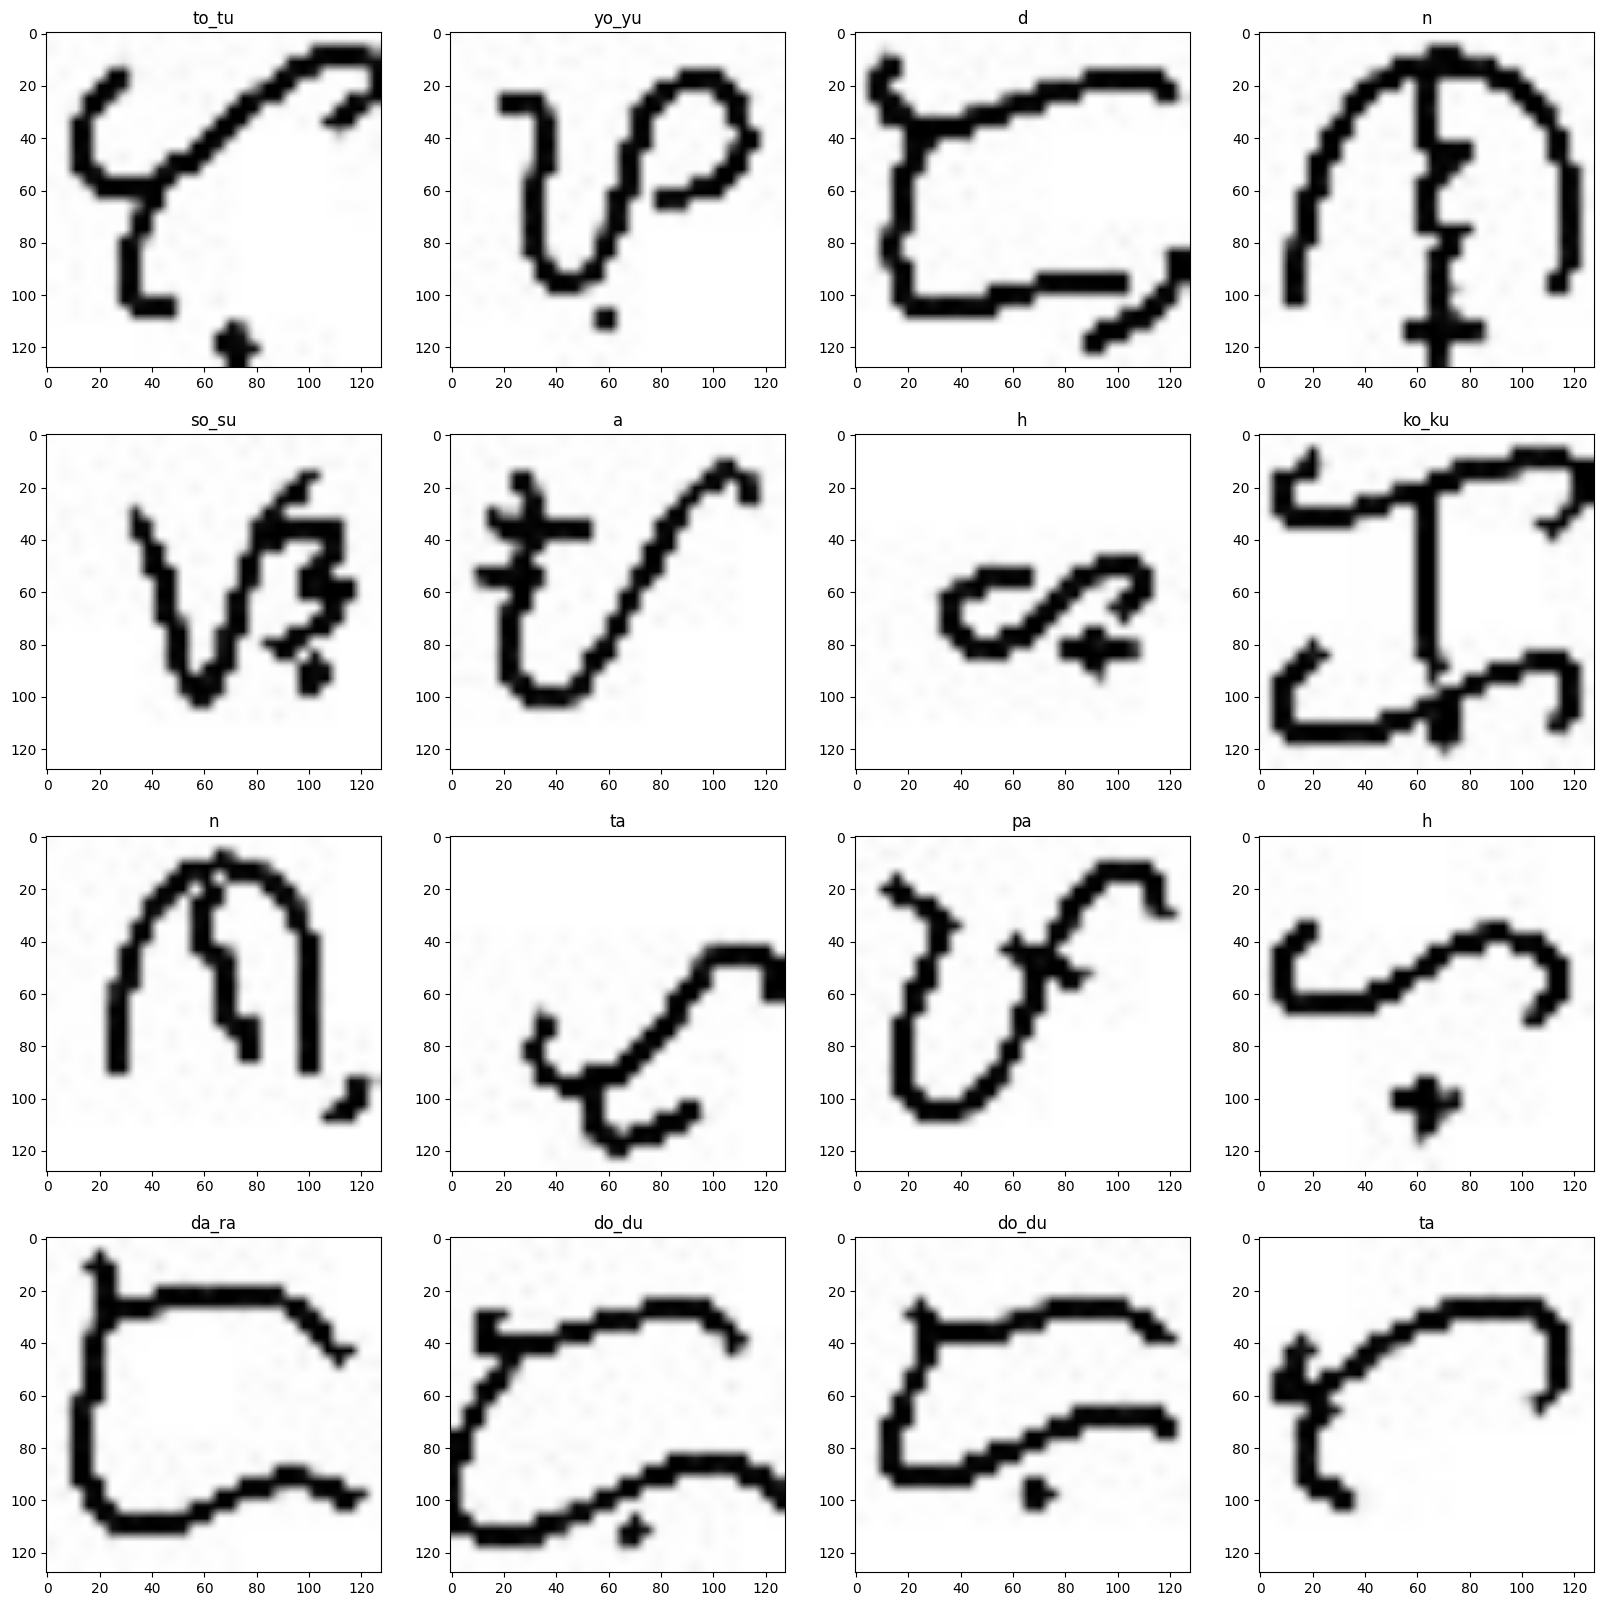

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:16]):
  ax[idx//4, idx%4].imshow(img.astype(int), cmap='Greys_r')
  ax[idx//4, idx%4].title.set_text(syllable_list[batch[1][idx]])

Now, we should scale our data down from 0-255 to 0-1. Thus, we divide all of our picture matrices by 255.

In [ ]:
scaled_data = data.map(lambda feature, target: (feature/255, target)) # scaling the feature (picture matrix) and leaving the target alone

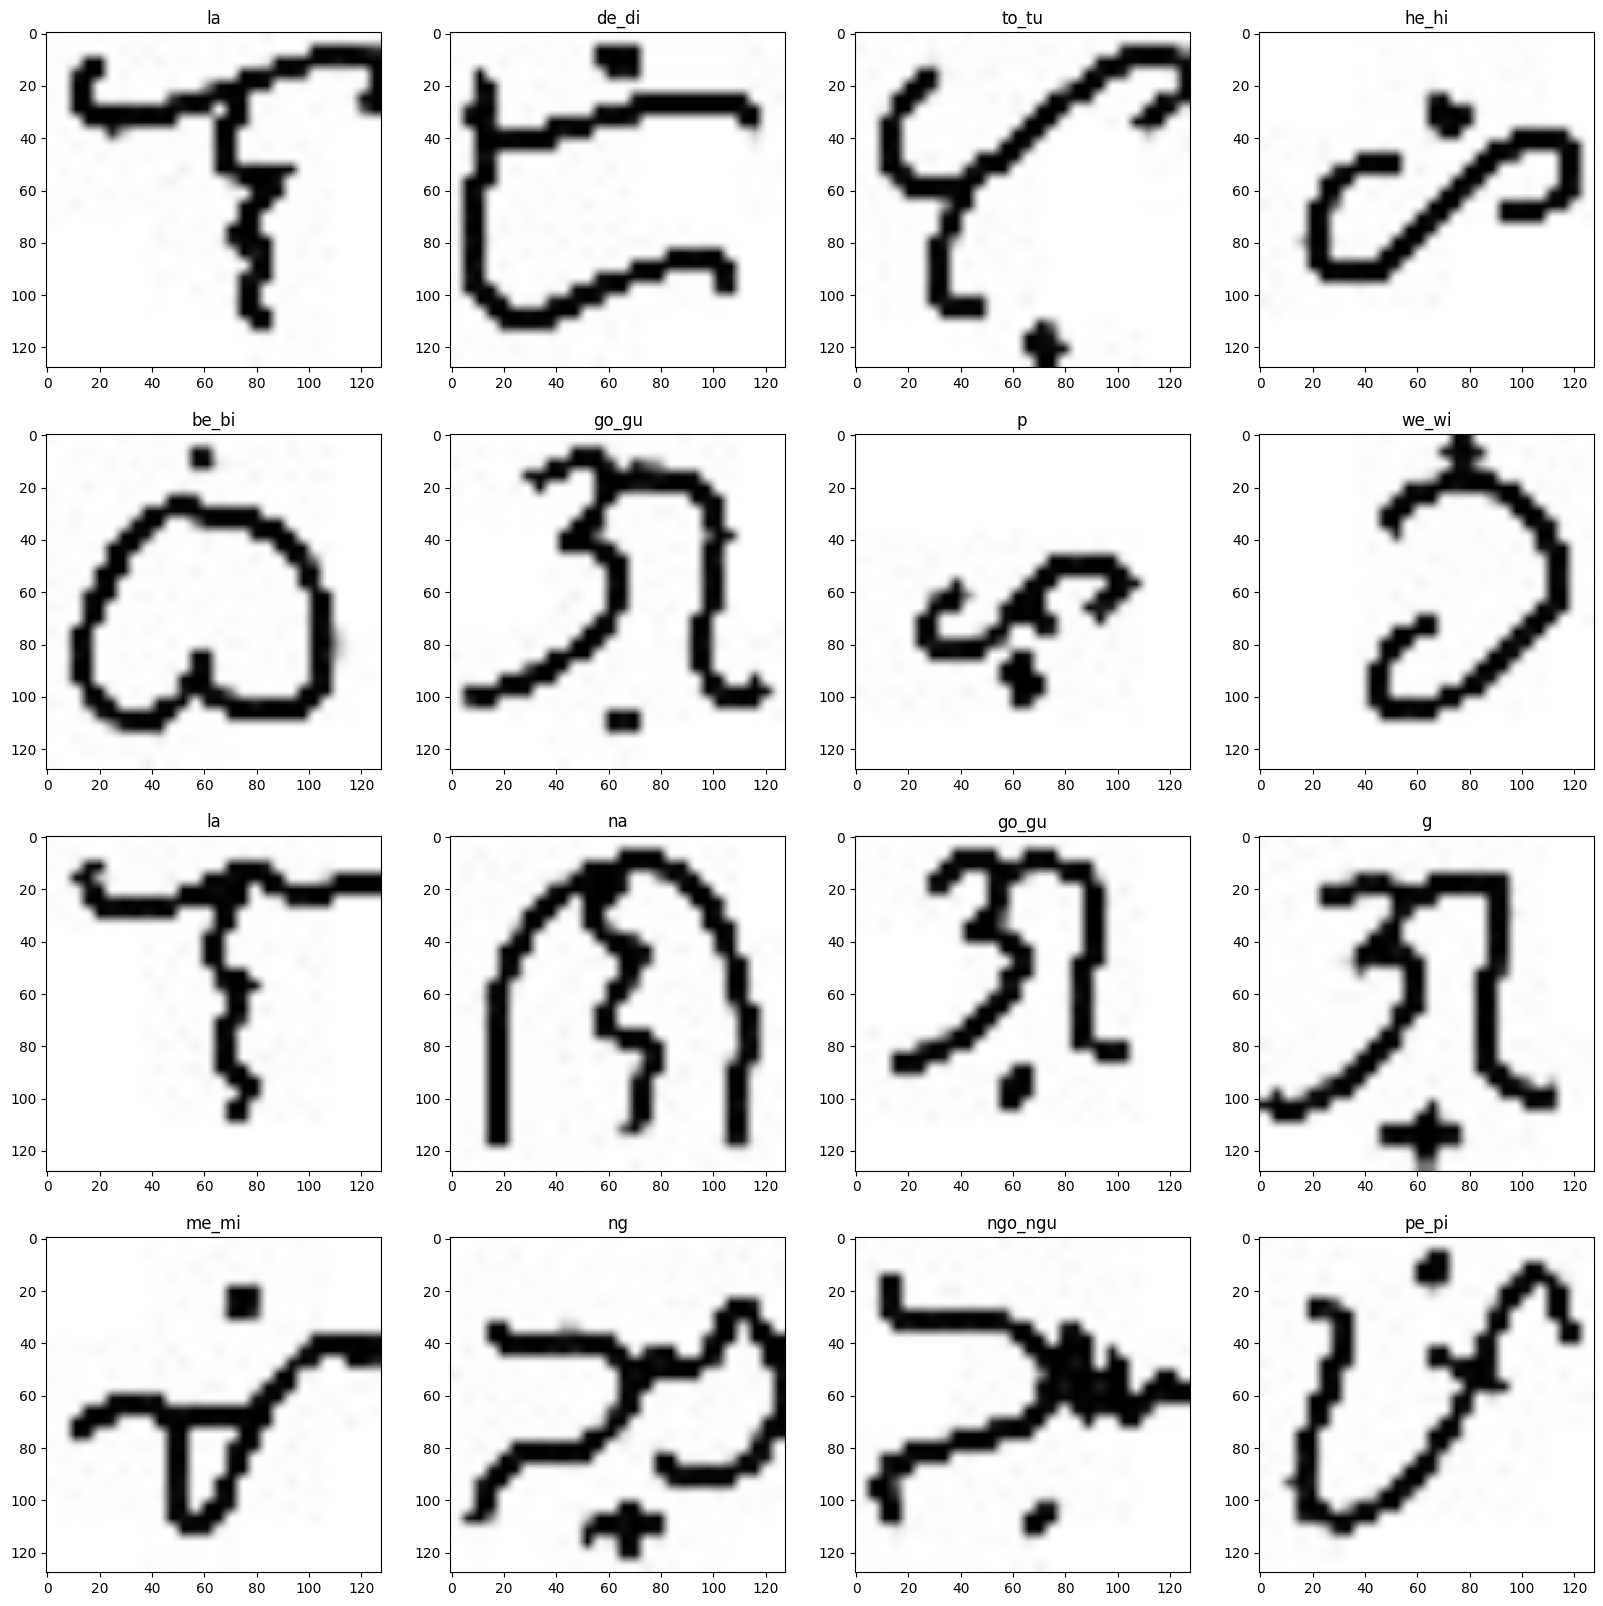

In [ ]:
scaled_iterator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
for idx, img in enumerate(scaled_batch[0][:16]):
  ax[idx//4, idx%4].imshow(img, cmap='Greys_r')
  ax[idx//4, idx%4].title.set_text(syllable_list[scaled_batch[1][idx]])

Now, we can finally split our data to training, validating, and testing partitions. We will use a 70-20-10 split.

In [ ]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1) + 1 # we add one to the test_size so that their total adds up to 301

Is their total equal to the length of scaled_data?

In [ ]:
train_size + val_size + test_size == len(scaled_data)

True

Now, we can finally partition our data using the `.take` and `.skip` functions.

In [ ]:
train = scaled_data.take(train_size) # take train size
val = scaled_data.skip(train_size).take(val_size) # skip all of the pictures taken in train, take val size
test = scaled_data.skip(train_size + val_size).take(test_size) # skip both, take test size

## Initializing the model

We will use the Sequential model and just stack 2d convolution layers. The last layer will be softmax because we have 63 targets, corresponding to the 63 syllables.

Furthermore, since our pictures are of a very small size, we can only have 1 convolution layer instead of three unlike the video.

In [ ]:
# Initialize the model
model = Sequential()

# Add layers to the model
## Layer 1
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(128, 128, 1))) # 16 kernels of size 3x3 that moves 1 pixel at a time, input_shape is the shape of our image
model.add(MaxPooling2D())
## Layer 2
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
## Layer 3
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
## Layer 4
model.add(Flatten())
## Last layer
model.add(Dense(28, activation='relu')) # fully connected layers, 128 because of our image size
model.add(Dense(63, activation='softmax')) # softmax instead of sigmoid because we have 63 targets

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The video uses `BinaryCrossentropy()` for their loss function but that is not what we want. Since we have multiple targets, we cannot use that loss function. [This website](https://neptune.ai/blog/keras-loss-functions) can tell you what loss function to use. In our case, since we have integers as our targets, we will use `SparseCategoricalCrossentropy()`.

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28)                  │          87,836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 63)                  │           1,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,087 (387.06 KB)

 Trainable params: 99,087 (387.06 KB)

 Non-trainable params: 0 (0.00 B)

Now, we will start training our model.

In [ ]:
# For our log directory
logdir = 'logs'
# Saving a checkpoint of our model training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# Fitting the model
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 106s 488ms/step - accuracy: 0.1102 - loss: 3.6761 - val_accuracy: 0.4547 - val_loss: 1.7768
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 95s 454ms/step - accuracy: 0.5395 - loss: 1.4378 - val_accuracy: 0.6516 - val_loss: 1.0541
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 101s 480ms/step - accuracy: 0.7301 - loss: 0.7999 - val_accuracy: 0.7354 - val_loss: 0.8740
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 98s 469ms/step - accuracy: 0.8245 - loss: 0.5280 - val_accuracy: 0.7693 - val_loss: 0.7279
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 96s 459ms/step - accuracy: 0.8772 - loss: 0.3608 - val_accuracy: 0.7932 - val_loss: 0.7660
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 94s 448ms/step - accuracy: 0.9138 - loss: 0.2537 - val_accuracy: 0.7943 - val_loss: 0.7859
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 95s 453ms/step - accuracy: 0.9347 - loss: 0.1848 - val_accuracy: 0.8266 - val_loss: 0.7592
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 95s 455ms/step - accuracy: 0.9588 - loss:

Let's look at the metrics of the model using `.history`.

In [ ]:
pd.DataFrame(hist.history)

,accuracy,loss,val_accuracy,val_loss
0,0.234673,2.966388,0.454688,1.776792
1,0.595833,1.237820,0.651563,1.054071
2,0.754018,0.715651,0.735417,0.873969
3,0.838690,0.465232,0.769271,0.727880
4,0.891369,0.318917,0.793229,0.765956
5,0.922470,0.223735,0.794271,0.785937
6,0.946280,0.154803,0.826563,0.759217
7,0.958631,0.119588,0.798437,0.909771
8,0.964137,0.101302,0.833333,0.825993
9,0.977083,0.068531,0.815104,1.015904


We can see that our loss was going down every epoch while our accuracy increases. Let's actually look at this with a graph to see the performance of our model clearer.

Text(0, 0.5, 'Loss')

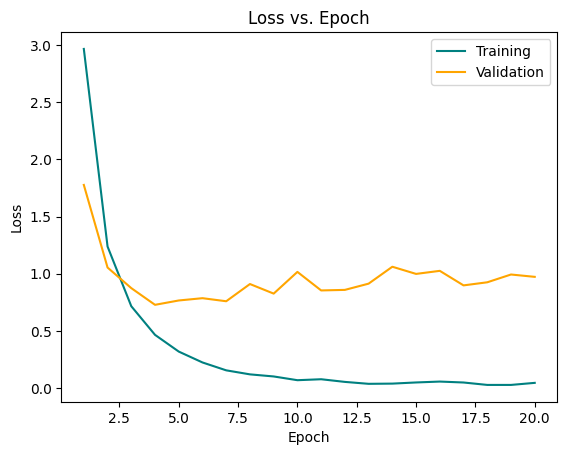

In [ ]:
epochs = np.arange(1, 21)
plt.plot(epochs, hist.history['loss'], color='teal', label='Training')
plt.plot(epochs, hist.history['val_loss'], color='orange', label='Validation')
plt.legend()
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

We can see that the training loss decreases for every epoch and the validation's as well, but it plateaus starting from Epoch 10.

(0.0, 1.0)

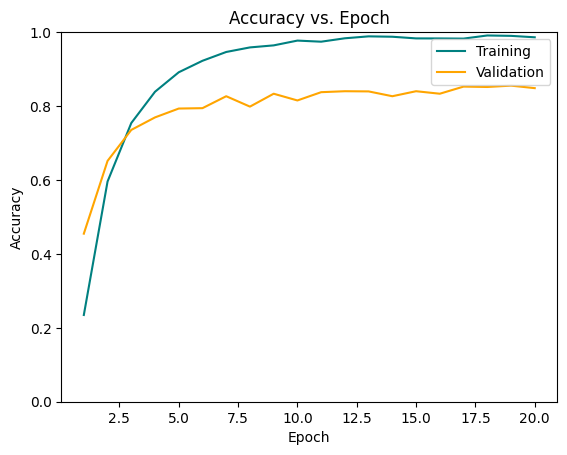

In [ ]:
plt.plot(epochs, hist.history['accuracy'], color='teal', label='Training')
plt.plot(epochs, hist.history['val_accuracy'], color='orange', label='Validation')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

We can see that the training accuracy also increases however, the same thing happens to the validation accuracy wherein it plateaus at around Epoch 10.

Additionally, we can evaluate the performance of our model using the Keras metrics' functions `Precision`, `Recall`, and `BinaryAccuracy`.

In [ ]:
classPrecision = Precision()
classRecall = Recall()
classCategoricalAccuracy = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  feature, target = batch
  target_hat = model.predict(feature)
  classPrecision.update_state(target, target_hat)
  classRecall.update_state(target, target_hat)
  classCategoricalAccuracy.update_state(target, target_hat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,2016] [Op:LogicalAnd] name: 

In [ ]:
model.predict(scaled_batch).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(32, 63)

In [ ]:
for batch in test.as_numpy_iterator():
  feature, target = batch
  target_hat = model.predict(feature)
  # Convert target_hat to class indices for comparison with target
  target_hat_classes = np.argmax(target_hat, axis=1)
  classPrecision.update_state(target, target_hat_classes)
  classRecall.update_state(target, target_hat_classes)
  classBinaryAccuracy.update_state(target, target_hat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [ ]:
print(f'Precision: {classPrecision.result().numpy()}\nRecall: {classRecall.result().numpy()}\nAccuracy: {classBinaryAccuracy.result().numpy()}')

Precision: 0.9994826912879944
Recall: 1.0
Accuracy: 0.021472392603754997


Why the fuck does our model have 2% accuracy 🤨

Let's try to save our model using

<center>

```name_of_model.save('directory') ```

</center>

In [ ]:
model.save(os.path.join('models', 'baybayin_model_20250127.keras'))

Now, we can load our saved model using the command

<center>

``` tensorflow.keras.models.load_model('directory')```

</center>

In [ ]:
model_jan_27 = tf.keras.models.load_model('/content/models/baybayin_model_20250127.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Testing with handwritten data

Let's load in the glyph "la" that the model has not seen.

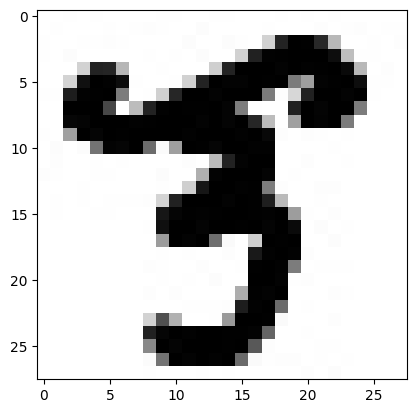

In [ ]:
la_test = cv2.imread('/content/la.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(la_test, cmap='Greys_r')

In [ ]:
la_test = cv2.imread('/content/la.jpg', cv2.IMREAD_GRAYSCALE)
la_test = cv2.resize(la_test, (128, 128))
la_test = la_test.reshape(1, 128, 128, 1) # Reshape to (1, 28, 28, 1) for single image prediction
la_predict = model.predict(la_test/255, 23) # Predict on the reshaped and scaled image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [ ]:
la_predict

array([[2.0685300e-30, 2.3636161e-37, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.3647942e-19, 8.7257981e-37, 0.0000000e+00,
        2.7728675e-25, 4.8112702e-32, 8.8612759e-16, 1.6483187e-32,
        0.0000000e+00, 3.3299964e-27, 1.1575449e-17, 0.0000000e+00,
        0.0000000e+00, 3.0920910e-20, 1.1053449e-12, 4.4125382e-27,
        3.6087185e-38, 1.6351235e-06, 1.3994222e-10, 2.9918923e-12,
        1.0414615e-20, 9.9999344e-01, 5.4332128e-19, 3.2634996e-25,
        9.5672475e-34, 4.6885104e-20, 2.7207976e-21, 1.5658753e-31,
        9.1833393e-34, 4.3873484e-14, 5.3554590e-16, 3.8799382e-18,
        2.8097316e-09, 3.9018795e-16, 1.2617026e-28, 4.9333007e-06,
        3.1623891e-27, 1.9341121e-33, 3.3794351e-17, 8.4242419e-20,
        5.6176949e-25, 1.4123900e-25, 6.6389022e-35, 3.7961841e-16,
        6.3979305e-35, 0.0000000e+00, 3.5492430e-26, 2.6267873e-35,
        0.0000000e+00, 0.0000000e+00, 6.6513469e-28, 1.0700490e-22,
        9.7459639e-29, 0.0000000e+00, 2.4337137e

In [ ]:
syllable_dictionary = dict(enumerate(syllable_list))

In [ ]:
la_predict_top_10 = np.argpartition(la_predict[0], -10)[-10:]
la_predict_top_10

array([34, 10, 33, 23, 18, 21, 36, 25, 22, 39])

Text(0.5, 1.0, 'Predictions for la')

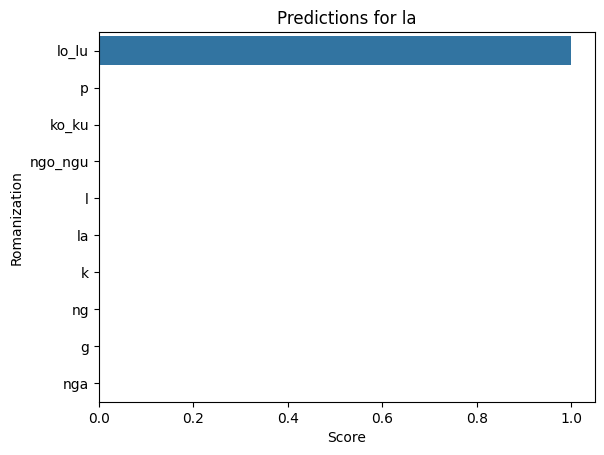

In [ ]:
la_syllable_top_10 = list(map(syllable_dictionary.get, la_predict_top_10))
la_scores_top_10 = list(la_predict[0][la_predict_top_10])
la_results_top_10 = pd.DataFrame({'Romanization':la_syllable_top_10, 'Score':la_scores_top_10})

sns.barplot(la_results_top_10.sort_values(by='Score', ascending=False), y='Romanization', x='Score')
plt.title('Predictions for la')

Let's make a function to speed up the process.

In [ ]:
def predict_syllable(image_directory, target_syllable):
  # Initialization
  image = cv2.imread(image_directory, cv2.IMREAD_GRAYSCALE)
  if image.shape != (128, 128):
    image = cv2.resize(image, (128, 128))
  else:
    pass
  image = image.reshape(1, 128, 128, 1) # Reshape to (1, 128, 128, 1) for single image prediction
  image = image/255 # scaling the image

  # Prediction
  image_predict = model.predict(image) # Predict on the reshaped and scaled image
  predict_top_10 = np.argpartition(image_predict[0], -10)[-10:]
  syllable_top_10 = list(map(syllable_dictionary.get, predict_top_10))
  scores_top_10 = list(image_predict[0][predict_top_10])
  la_results_top_10 = pd.DataFrame({'Romanization':syllable_top_10, 'Score':scores_top_10})

  # Plotting
  ax, fig = plt.subplots(1, 2, figsize=(20, 7))
  plt.suptitle(f'Results for {target_syllable}', fontsize=20)

  plt.subplot(1, 2, 1)
  plt.imshow(image.reshape(128, 128), cmap='Greys_r')
  plt.title('Input image')
  plt.subplot(1, 2, 2)
  plt.title('Top 10 predictions')
  sns.barplot(la_results_top_10.sort_values(by='Score', ascending=False), y='Romanization', x='Score')

  return None

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


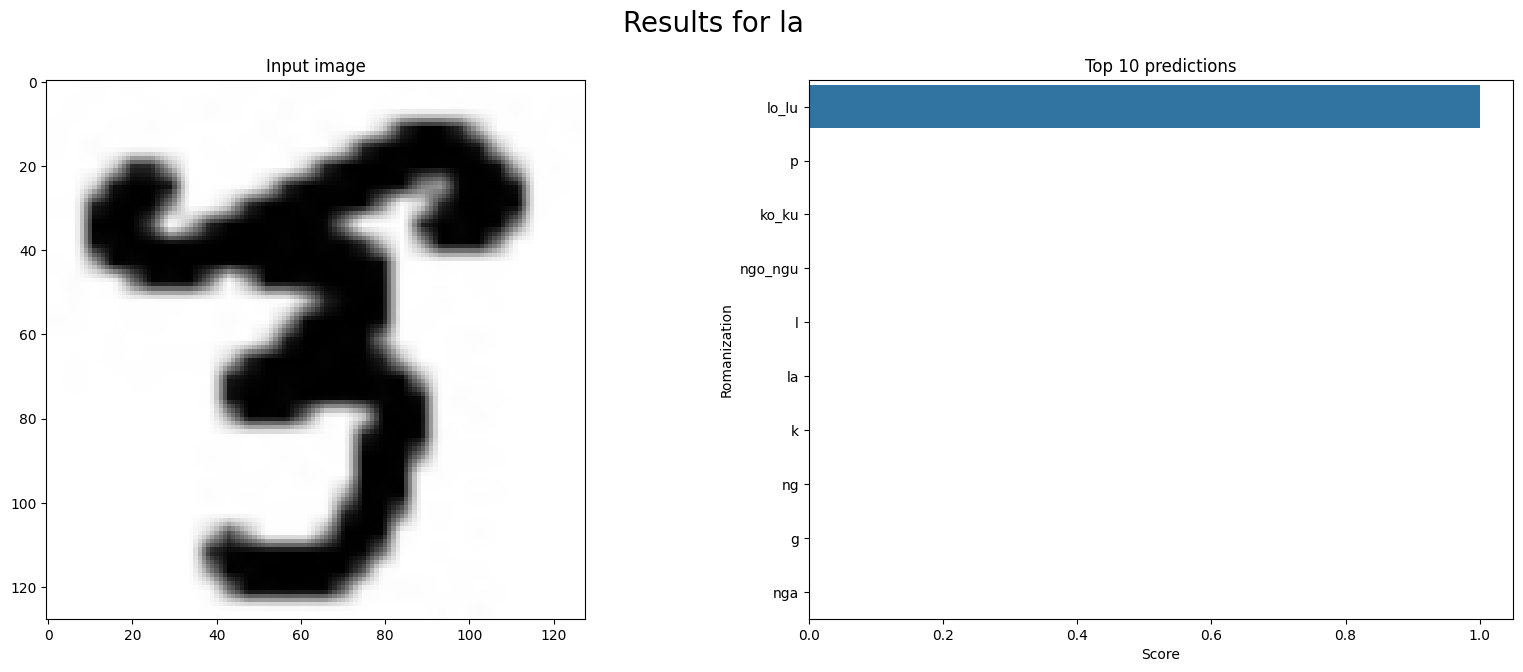

In [ ]:
predict_syllable('/content/la.jpg', 'la')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


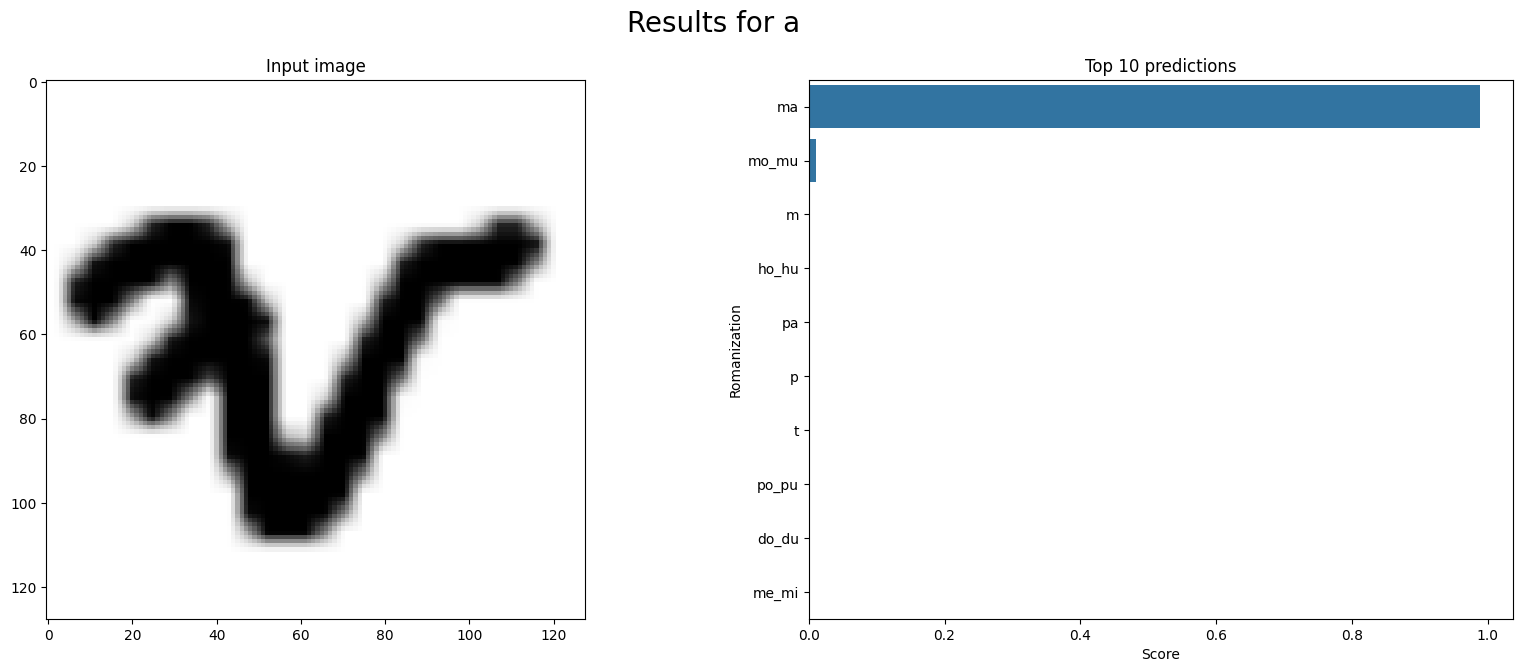

In [ ]:
predict_syllable('/content/a.png', 'a')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


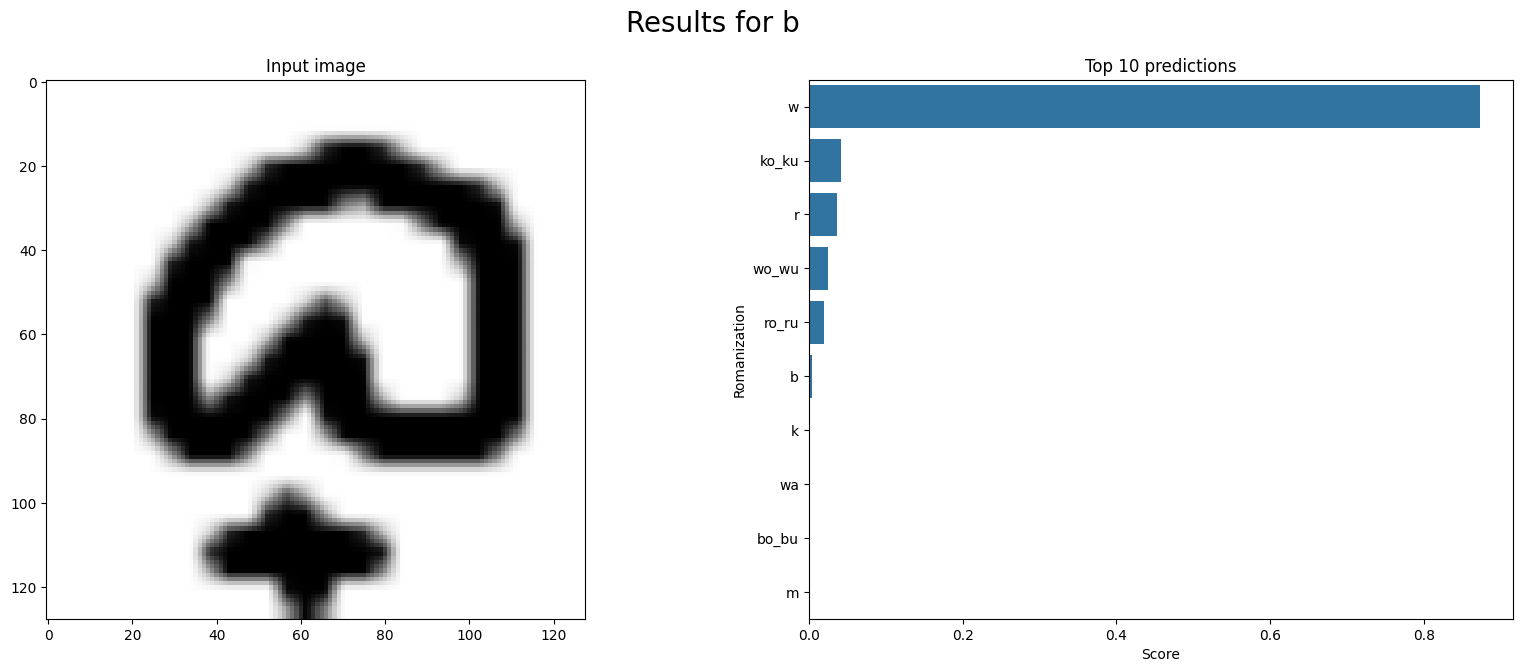

In [ ]:
predict_syllable('/content/b.png', 'b')

Let's try changing our ink size.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


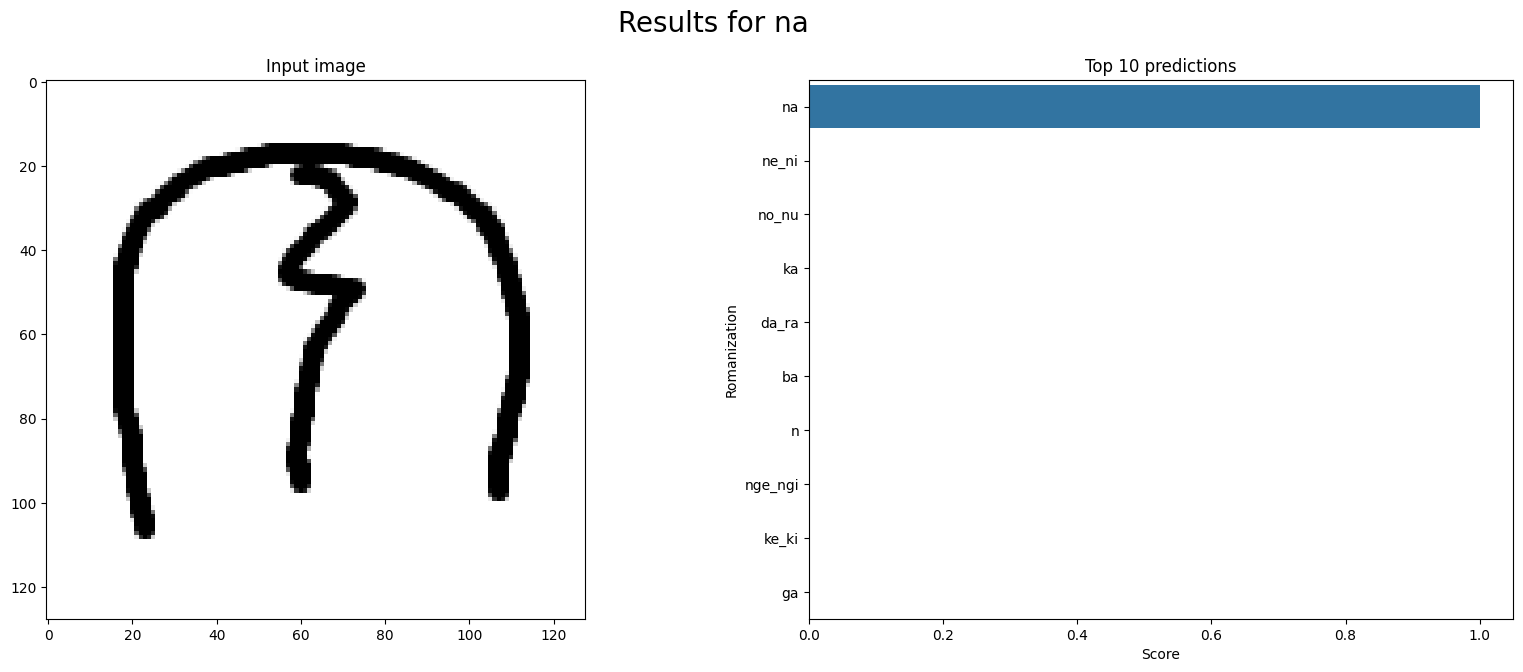

In [ ]:
predict_syllable('/content/na.png', 'na')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


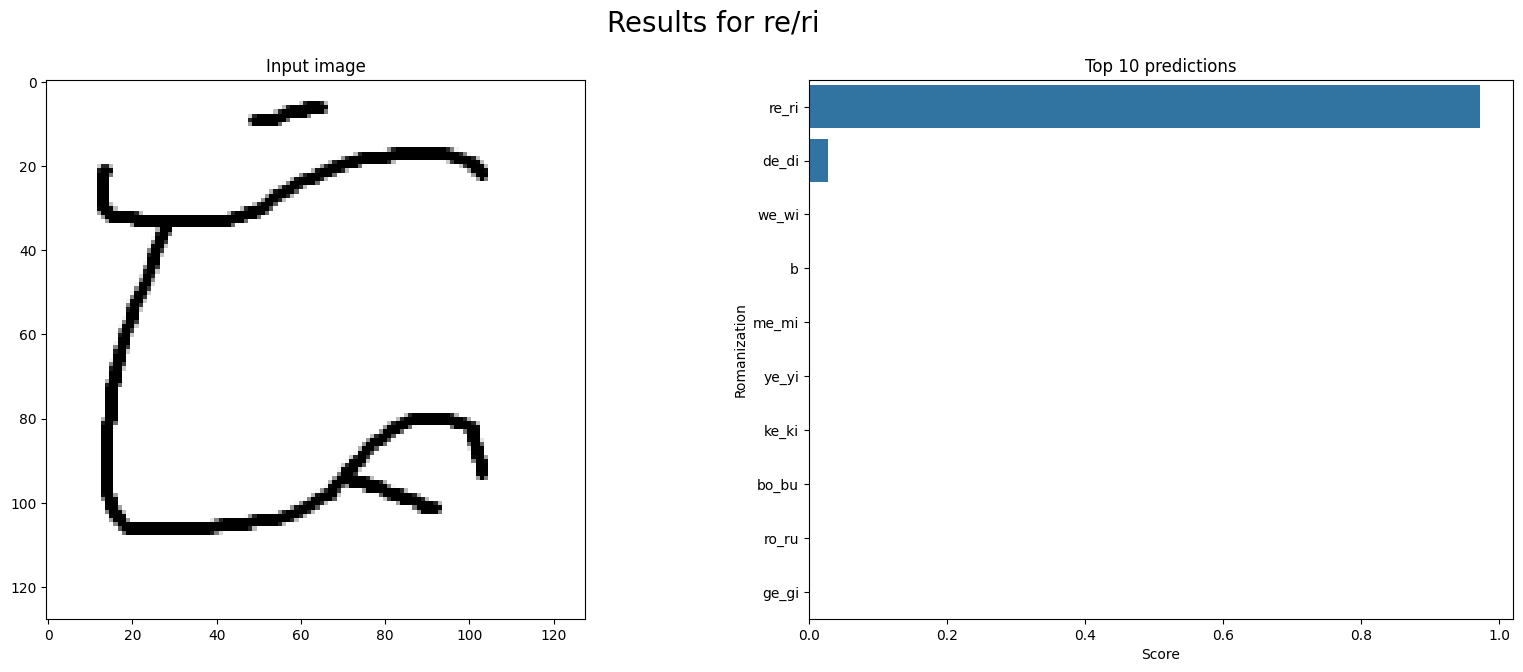

In [ ]:
predict_syllable('/content/de_di.png', 're/ri')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


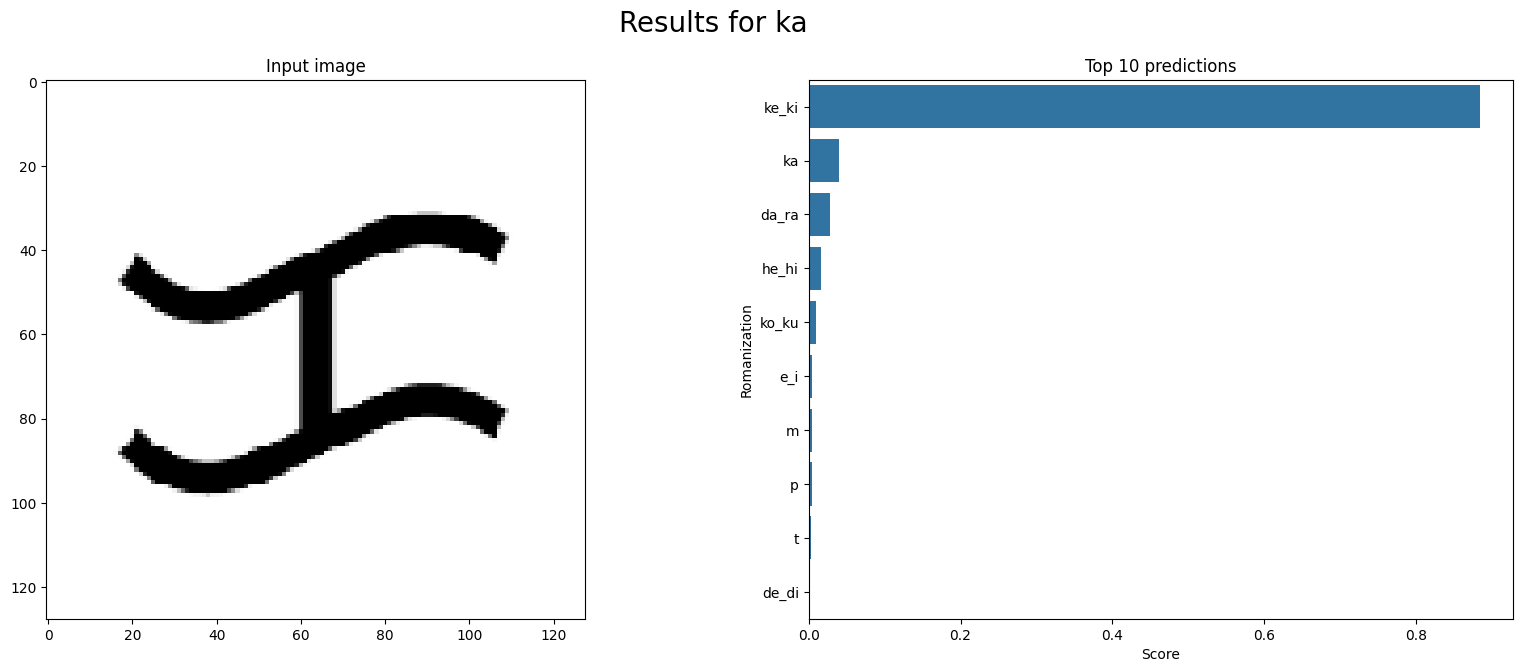

In [ ]:
predict_syllable('/content/ka_print.png', 'ka')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


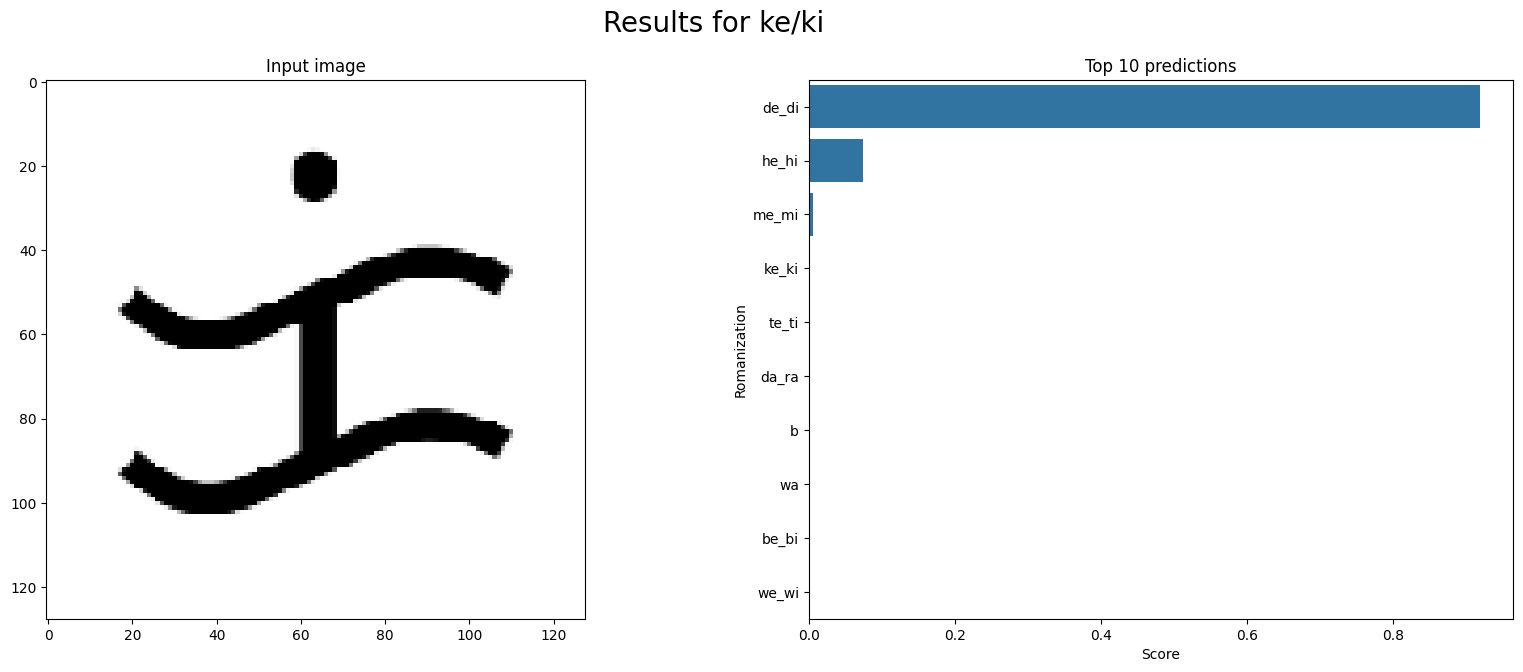

In [ ]:
predict_syllable('/content/ke_ki_print.png', 'ke/ki')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


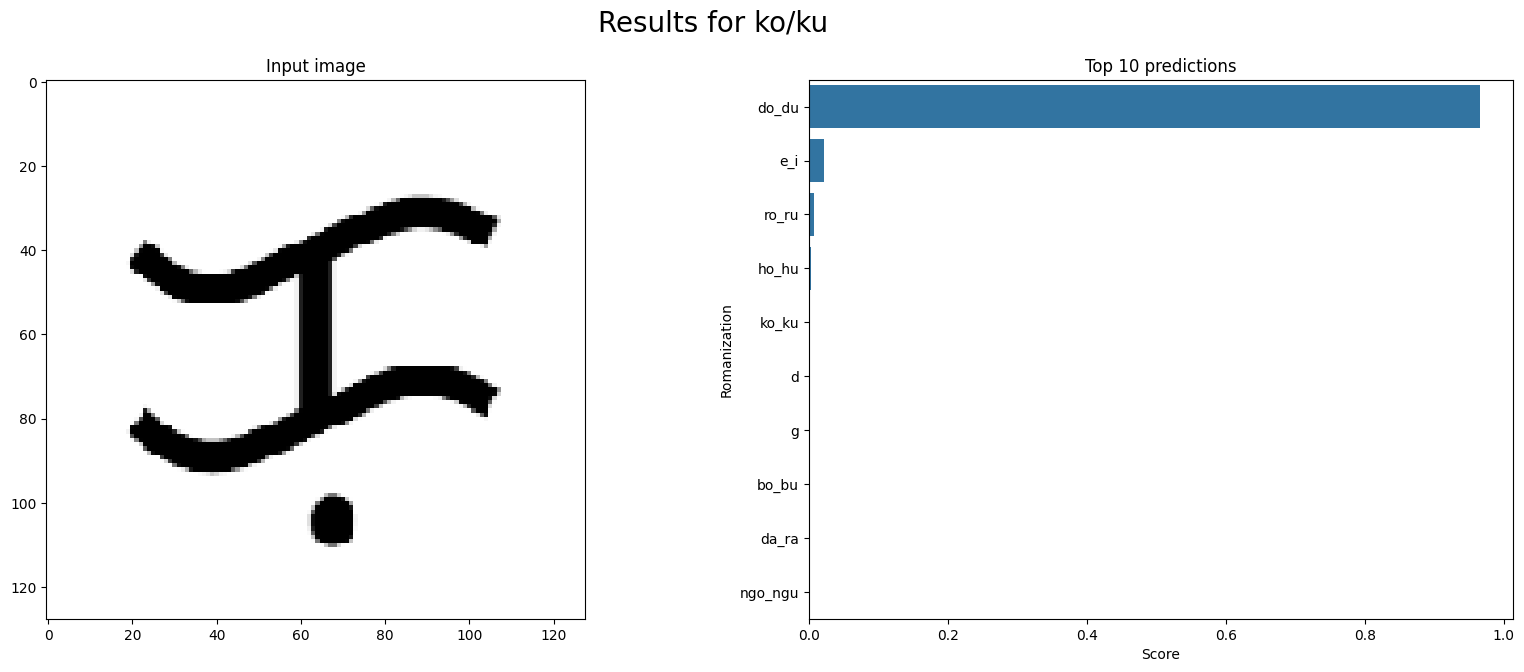

In [ ]:
predict_syllable('/content/ko_ku_print.png', 'ko/ku')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


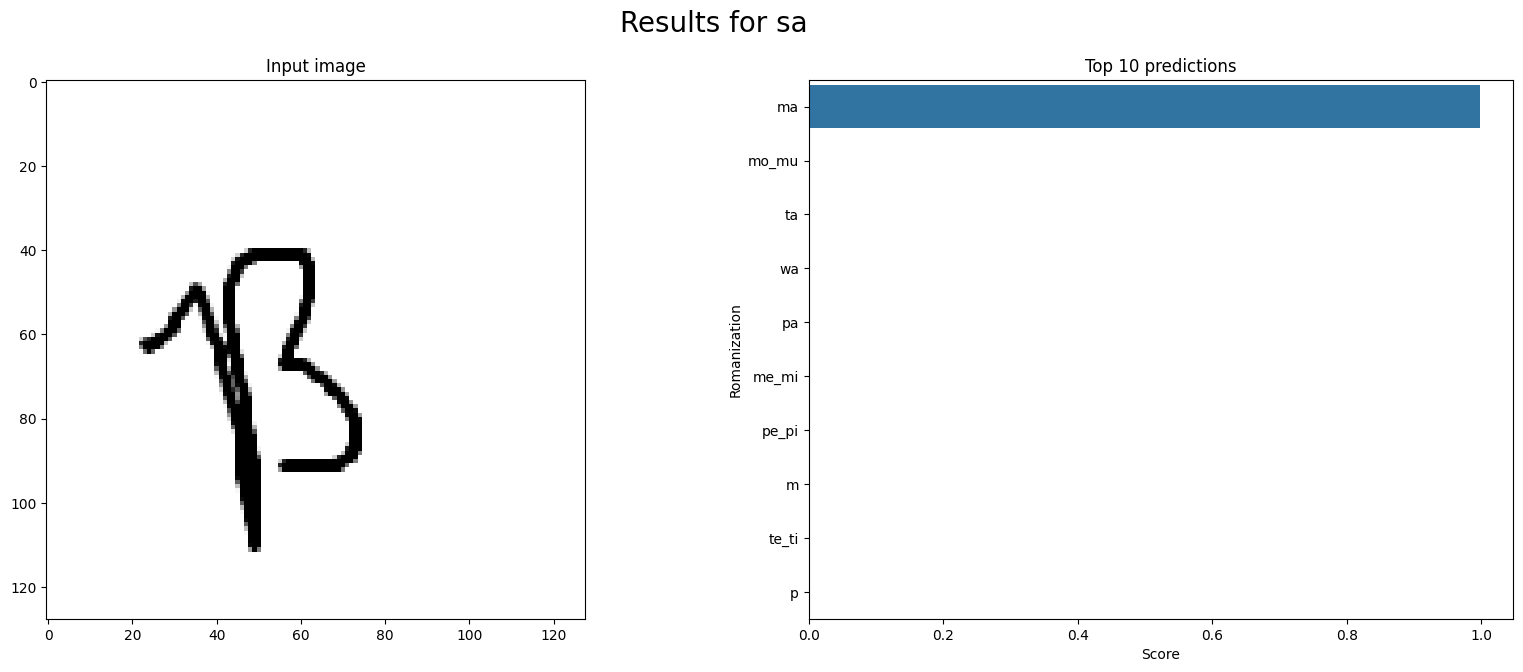

In [ ]:
predict_syllable('/content/sa_lexis.png', 'sa')

Okay so this was a hit or miss. What I think is the model is so heavily trained on letters with small ink sizes. When it encounters a glyph with a larger ink size, it gets confused.

If we could only see the 'eigenglyphs' of the model, we can see what's going on.